In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from time import time
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import pickle
import joblib
from joblib import dump, load

In [2]:
%matplotlib inline 

In [3]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [8]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

In [9]:
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [10]:
count_vect = CountVectorizer(min_df = 3, stop_words = 'english')

In [11]:
X = count_vect.fit_transform(dataset.data)

In [17]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
print(X_tfidf.shape)

(7882, 27768)


In [27]:
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs =-1)

#means_clf =MiniBatchKMeans(n_clusters=2,random_state=0,batch_size=6,max_iter  = 1000, n_init = 30)

In [28]:
t0 = time()
kmeans_clf.fit(X_tfidf)
print("done in %0.3fs" % (time() - t0))

done in 2.200s


In [69]:
###### Generate labels####
y = np.zeros((len(dataset.data)))
for i in range(len(dataset.target)):
    if(dataset.target[i] <= 3):
        y[i] = 0
    else:
        y[i] = 1

In [70]:
contingency_matrix(y, kmeans_clf.labels_)

array([[3613,  290],
       [ 315, 3664]])

In [38]:
print("The homogenity score is " + str(homogeneity_score(y, kmeans_clf.labels_)))
print("The completeness score is " + str(completeness_score(y, kmeans_clf.labels_)))
print("The V-measure score is " + str(v_measure_score(y, kmeans_clf.labels_)))
print("The adjusted Rand Index score is " + str(adjusted_rand_score(y, kmeans_clf.labels_)))
print("The adjusted mutual information score is " + str(adjusted_mutual_info_score(y, kmeans_clf.labels_)))

The homogenity score is 0.07239132259060248
The completeness score is 0.1959825474777242
The V-measure score is 0.10572889091606381
The adjusted Rand Index score is 0.02238895648403063
The adjusted mutual information score is 0.07230633938157532


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


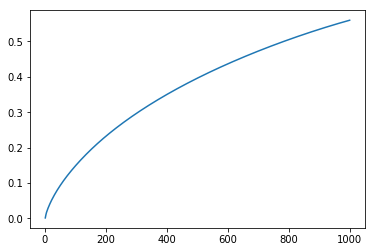

In [71]:
svd = TruncatedSVD(n_components=1000, random_state=0)
X_svd = svd.fit_transform(X_tfidf)
var_retained = svd.explained_variance_ratio_.cumsum()
plt.plot(range(1, 1001), var_retained)
plt.show()

In [72]:
np.shape(X_svd[:, :50])

(7882, 50)

In [73]:
#################################################
### Find the scores for different values of r ###
#################################################

svd_homo_score = []
svd_comp_score = []
svd_v_measure = []
svd_adj_rand = []
svd_mi_score = []

dim = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for d in dim:
    #svd = TruncatedSVD(n_components=1000, random_state=0)
    #X_svd = svd.fit_transform(X_tfidf)
    print("dimension r is ", d)
    kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
    kmeans_clf.fit(X_svd[:, :d])
    
    svd_homo_score.append(homogeneity_score(y, kmeans_clf.labels_))
    svd_comp_score.append(completeness_score(y, kmeans_clf.labels_))
    svd_v_measure.append(v_measure_score(y, kmeans_clf.labels_))
    svd_adj_rand.append(adjusted_rand_score(y, kmeans_clf.labels_))
    svd_mi_score.append(adjusted_mutual_info_score(y, kmeans_clf.labels_))

dimension r is  1
dimension r is  2


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  3


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  5


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  10


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  20


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  50


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  100


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  300


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [74]:
#################################################
### Find the scores for different values of r ###
#################################################

nmf_homo_score = []
nmf_comp_score = []
nmf_v_measure = []
nmf_adj_rand = []
nmf_mi_score = []

dim = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for d in dim:
    print("dimension r is ", d)
    nmf = NMF(n_components=d, init='random', random_state=0)
    X_nmf = nmf.fit_transform(X_tfidf)
    kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
    kmeans_clf.fit(X_nmf[:, :d])
    
    nmf_homo_score.append(homogeneity_score(y, kmeans_clf.labels_))
    nmf_comp_score.append(completeness_score(y, kmeans_clf.labels_))
    nmf_v_measure.append(v_measure_score(y, kmeans_clf.labels_))
    nmf_adj_rand.append(adjusted_rand_score(y, kmeans_clf.labels_))
    nmf_mi_score.append(adjusted_mutual_info_score(y, kmeans_clf.labels_))

dimension r is  1


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  2


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  3


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  5


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  10


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  20


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  50


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  100


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


dimension r is  300


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


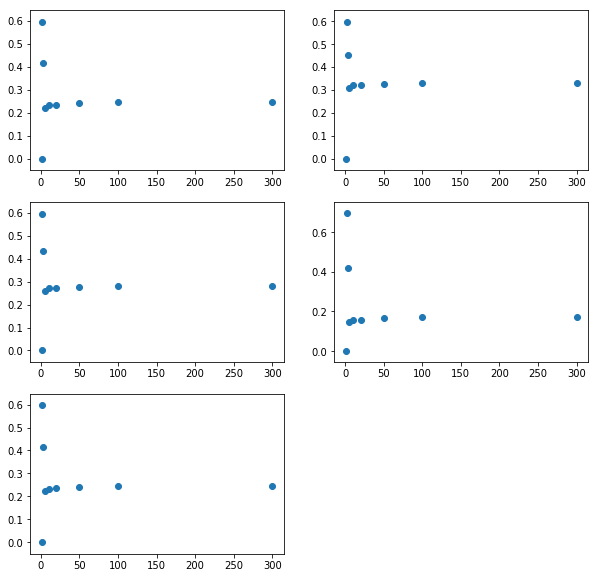

In [75]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), squeeze=False)
axs[0][0].scatter(dim, svd_homo_score)
axs[0][1].scatter(dim, svd_comp_score)
axs[1][0].scatter(dim, svd_v_measure)
axs[1][1].scatter(dim, svd_adj_rand)
axs[2][0].scatter(dim, svd_mi_score)
fig.delaxes(axs[2,1])
plt.show()

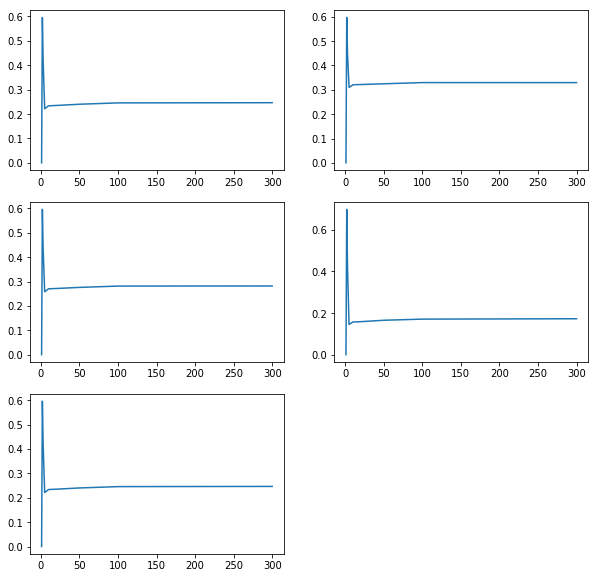

In [76]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), squeeze=False)
axs[0][0].plot(dim, svd_homo_score)
axs[0][1].plot(dim, svd_comp_score)
axs[1][0].plot(dim, svd_v_measure)
axs[1][1].plot(dim, svd_adj_rand)
axs[2][0].plot(dim, svd_mi_score)
fig.delaxes(axs[2,1])
plt.show()

In [101]:
print("For svd:")
print("Best r by svd_homo_score is", dim[np.argmax(np.array(svd_homo_score))])
print("Best r by svd_comp_score is",dim[np.argmax(np.array(svd_comp_score))])
print("Best r by svd_v_measure is",dim[np.argmax(np.array(svd_v_measure))])
print("Best r by svd_adj_rand is",dim[np.argmax(np.array(svd_adj_rand))])
print("Best r by svd_mi_score is",dim[np.argmax(np.array(svd_mi_score))])

For svd:
Best r by svd_homo_score is 2
Best r by svd_comp_score is 2
Best r by svd_v_measure is 2
Best r by svd_adj_rand is 2
Best r by svd_mi_score is 2


In [ ]:
svd_mi_score

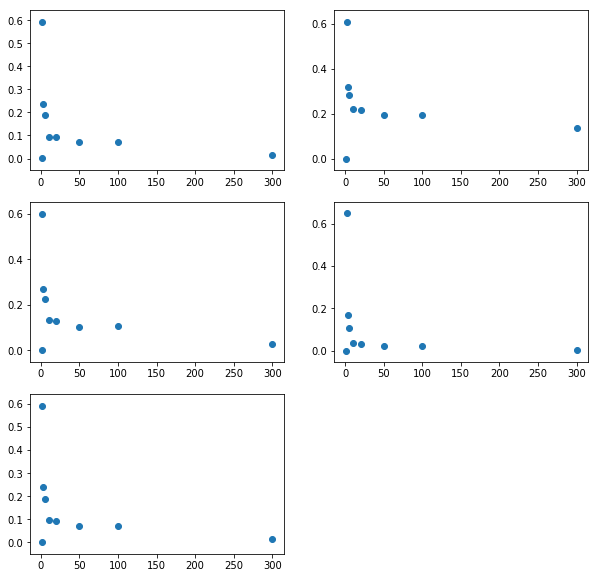

In [84]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), squeeze=False)
axs[0][0].scatter(dim, nmf_homo_score)
axs[0][1].scatter(dim, nmf_comp_score)
axs[1][0].scatter(dim, nmf_v_measure)
axs[1][1].scatter(dim, nmf_adj_rand)
axs[2][0].scatter(dim, nmf_mi_score)
fig.delaxes(axs[2,1])
plt.show()

In [100]:
print("For nmf:")
print("Best r by nmf_homo_score is", dim[np.argmax(np.array(nmf_homo_score))])
print("Best r by nmf_comp_score is",dim[np.argmax(np.array(nmf_comp_score))])
print("Best r by nmf_v_measure is",dim[np.argmax(np.array(nmf_v_measure))])
print("Best r by nmf_adj_rand is",dim[np.argmax(np.array(nmf_adj_rand))])
print("Best r by nmf_mi_score is",dim[np.argmax(np.array(nmf_mi_score))])

For nmf:
Best r by nmf_homo_score is 2
Best r by nmf_comp_score is 2
Best r by nmf_v_measure is 2
Best r by nmf_adj_rand is 2
Best r by nmf_mi_score is 2


-------------------------------Question 7---------------------------

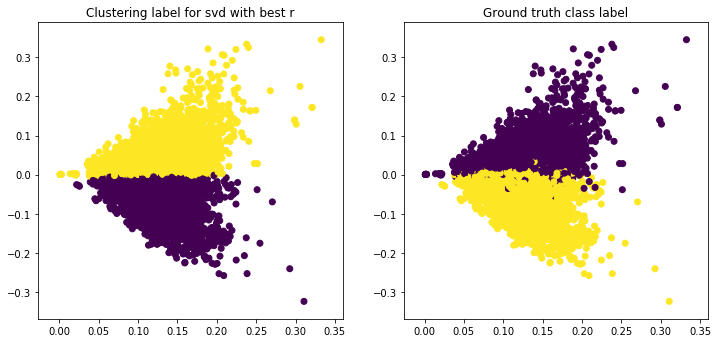

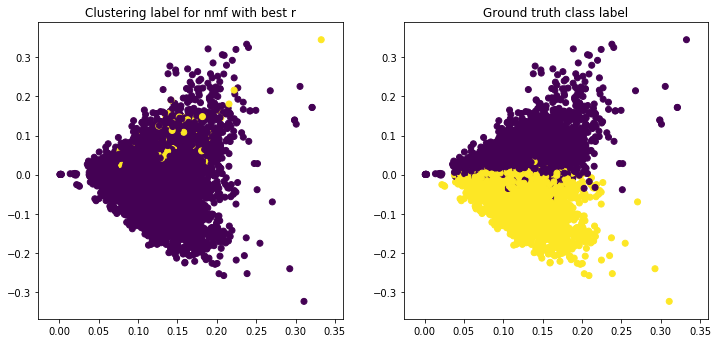

In [87]:

def plot_clustering_results_vs_groundtruth(y_pred, title):
        X_svd_2d = X_svd[:, :2]
        plt.figure(figsize=(12, 12))
        plt.subplot(221)
        plt.scatter(X_svd_2d[:, 0], X_svd_2d[:, 1], c=y_pred)
        plt.title(title)

        plt.subplot(222)
        plt.scatter(X_svd_2d[:, 0], X_svd_2d[:, 1], c=y)
        plt.title("Ground truth class label")

X_svd_2d = X_svd[:, :2]
X_svd_best = X_svd[:, :2]

kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_svd = kmeans_clf.fit_predict(X_svd_best)

plot_clustering_results_vs_groundtruth(y_pred_svd,"Clustering lables for svd with best r")


X_nmf_best = X_nmf[:, :2]

kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_nmf = kmeans_clf.fit_predict(X_nmf_best)
plot_clustering_results_vs_groundtruth(y_pred_nmf,"Clustering lables for nmf with best r")



In [88]:
print(X_svd_best.shape)

(7882, 2)


-------------------------------Question 8,9,10---------------------------

[1. 1.]


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


For Clustering lables for svd with best r and unit var the metric values are : 
nmf_homo_score is  0.23609131805072042
nmf_comp_score is  0.26450291273288246
nmf_v_measure is  0.24949085488903866
nmf_adj_rand is  0.2556510317794412
nmf_mi_score is  0.2360213789796711
For Clustering lables for svd with best r and log tranformation the metric values are : 
nmf_homo_score is  0.6094447324650026
nmf_comp_score is  0.609408642445872
nmf_v_measure is  0.609426686921128
nmf_adj_rand is  0.7165020096856823
nmf_mi_score is  0.6093728858160544


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


For Clustering lables for svd with best r -Unit var first then log the metric values are : 
nmf_homo_score is  0.6094447324650026
nmf_comp_score is  0.609408642445872
nmf_v_measure is  0.609426686921128
nmf_adj_rand is  0.7165020096856823
nmf_mi_score is  0.6093728858160544
For Clustering lables for svd with best r -Log first then Unit var  the metric values are : 
nmf_homo_score is  0.6094447324650026
nmf_comp_score is  0.609408642445872
nmf_v_measure is  0.609426686921128
nmf_adj_rand is  0.7165020096856823
nmf_mi_score is  0.6093728858160544
[1. 1.]


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


For Clustering lables for nmf with best r and unit var the metric values are : 
nmf_homo_score is  0.014691214289954626
nmf_comp_score is  0.1356024532531799
nmf_v_measure is  0.026510294565993825
nmf_adj_rand is  0.0013732921152795757
nmf_mi_score is  0.014600622181283582
For Clustering lables for nmf with best r and log tranformation the metric values are : 
nmf_homo_score is  0.0023264519034455846
nmf_comp_score is  0.0023369403814226305
nmf_v_measure is  0.0023316843475685296
nmf_adj_rand is  0.0029899683524736197
nmf_mi_score is  0.002235114465260073


c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
c:\users\vaish\onedrive\desktop\ucla\lsdm\project-2\lsdm-projects\.env\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


For Clustering lables for nmf with best r -Unit var first then log the metric values are : 
nmf_homo_score is  0.0023264519034455846
nmf_comp_score is  0.0023369403814226305
nmf_v_measure is  0.0023316843475685296
nmf_adj_rand is  0.0029899683524736197
nmf_mi_score is  0.002235114465260073
For Clustering lables for nmf with best r -Log first then Unit var  the metric values are : 
nmf_homo_score is  0.0023264519034455846
nmf_comp_score is  0.0023369403814226305
nmf_v_measure is  0.0023316843475685296
nmf_adj_rand is  0.0029899683524736197
nmf_mi_score is  0.002235114465260072


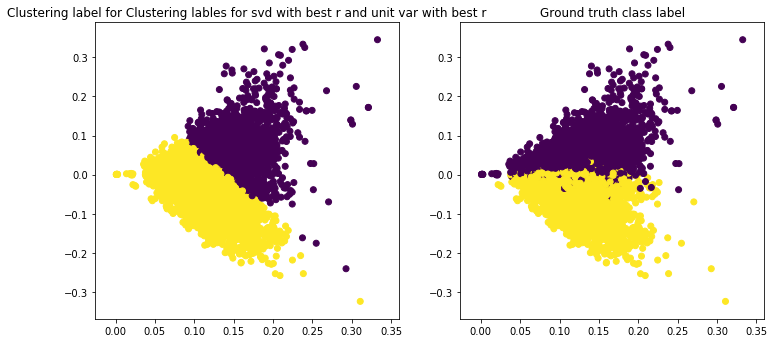

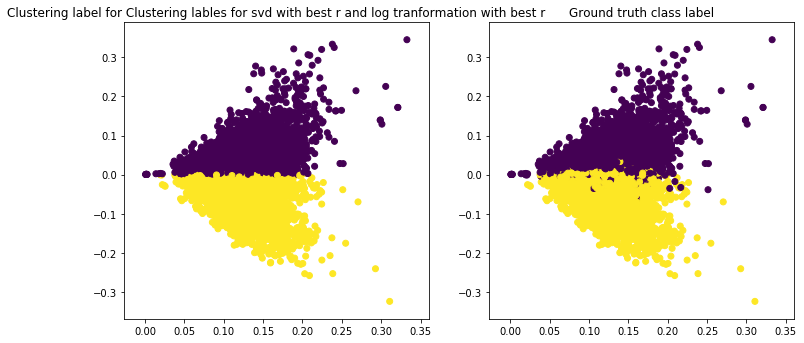

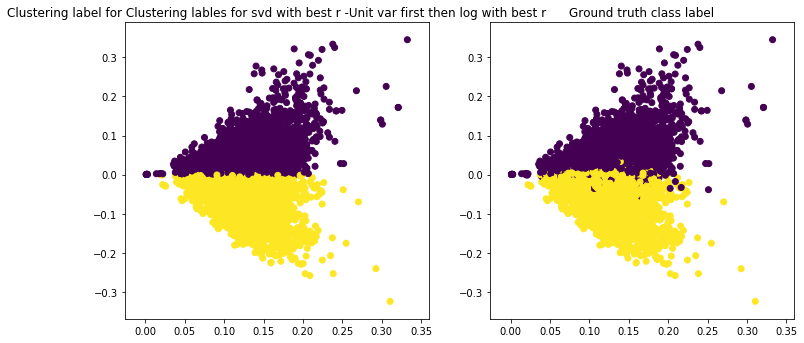

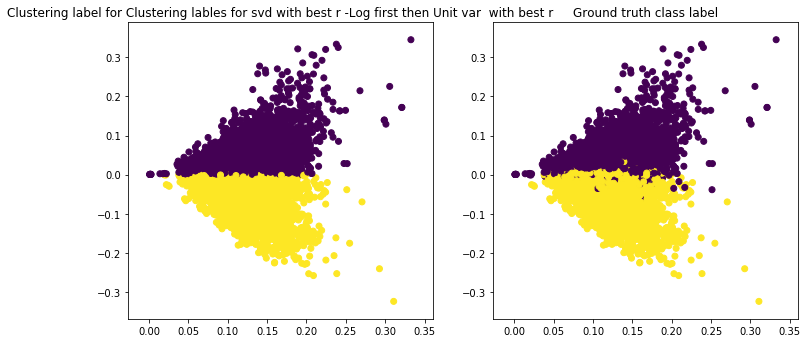

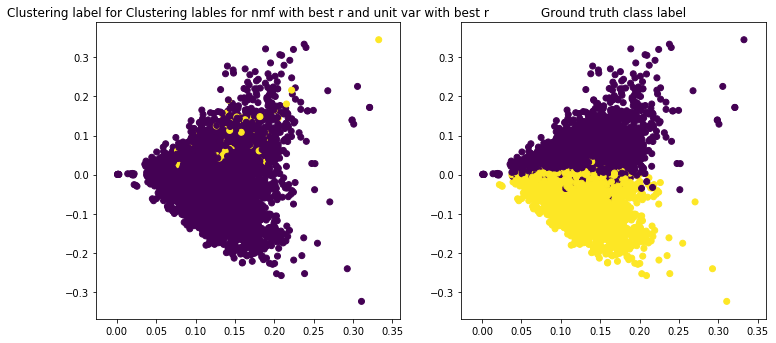

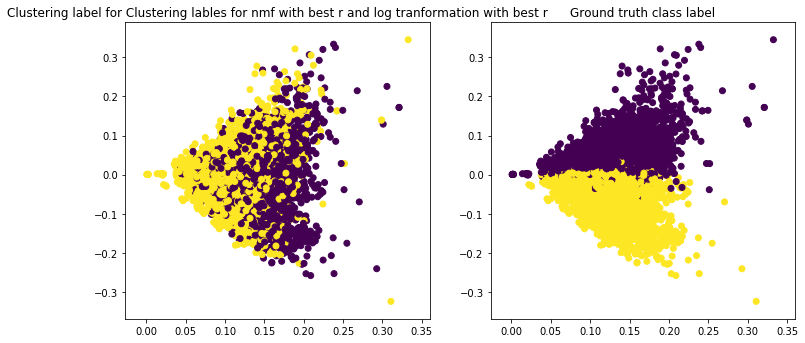

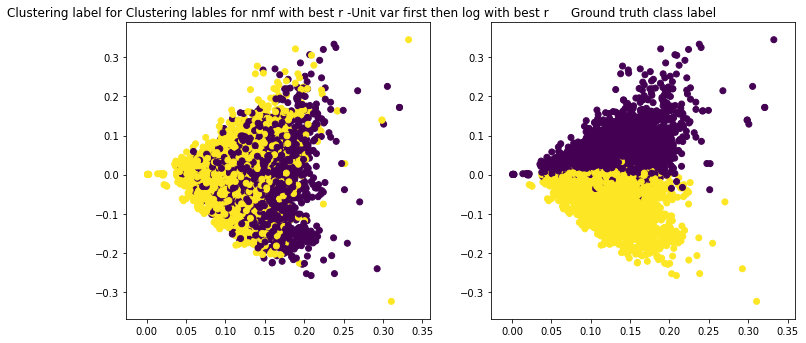

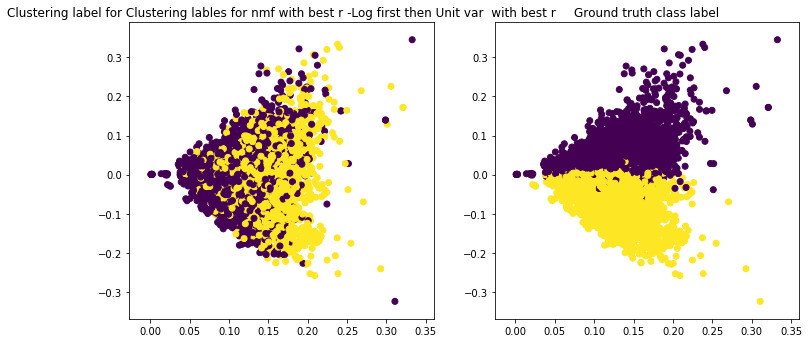

In [96]:
def print_measures(kmeans_clf, title):
    nmf_homo_score = homogeneity_score(y, kmeans_clf.labels_)
    nmf_comp_score = completeness_score(y, kmeans_clf.labels_)
    nmf_v_measure=v_measure_score(y, kmeans_clf.labels_)
    nmf_adj_rand=adjusted_rand_score(y, kmeans_clf.labels_)
    nmf_mi_score=adjusted_mutual_info_score(y, kmeans_clf.labels_)
    print("For " + str(title)+" the metric values are : ")
    print("nmf_homo_score is ",nmf_homo_score )
    print("nmf_comp_score is ",nmf_comp_score)
    print("nmf_v_measure is ",nmf_v_measure )
    print("nmf_adj_rand is ",nmf_adj_rand)
    print("nmf_mi_score is ",nmf_mi_score)
#For SVD
scaler = StandardScaler(with_mean = False, with_std =True)
x_Svd_Unit_Var = scaler.fit_transform(X_svd_best)
print(x_Svd_Unit_Var.std(axis=0))
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_svd_unit_var = kmeans_clf.fit_predict(x_Svd_Unit_Var)
plot_clustering_results_vs_groundtruth(y_pred_svd_unit_var,"Clustering lables for svd with best r and unit var" )
print_measures(kmeans_clf,"Clustering lables for svd with best r and unit var"  )

c = 0.01
x_Svd_f_sign =np.sign(X_svd_best) 
x_Svd_f = x_Svd_f_sign.dot(np.log(np.linalg.norm(X_svd_best)+c) - np.log(c))  #CHECK
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_svd_f = kmeans_clf.fit_predict(x_Svd_f)
plot_clustering_results_vs_groundtruth(y_pred_svd_f,"Clustering lables for svd with best r and log tranformation")
print_measures(kmeans_clf,"Clustering lables for svd with best r and log tranformation" )

#combine both - Unit var first then log 
x_Svd_f_sign =np.sign(x_Svd_Unit_Var) 
x_Svd_unitvar_f = x_Svd_f_sign.dot(np.log(np.linalg.norm(x_Svd_Unit_Var)+c) - np.log(c))  #CHECK
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_svd_unit_var_f = kmeans_clf.fit_predict(x_Svd_unitvar_f)
plot_clustering_results_vs_groundtruth(y_pred_svd_unit_var_f,"Clustering lables for svd with best r -Unit var first then log") 
print_measures(kmeans_clf,"Clustering lables for svd with best r -Unit var first then log" )

#combine both -Log first then Unit var 
x_Svd_f_sign =np.sign(X_svd_best) 
x_Svd_f = x_Svd_f_sign.dot(np.log(np.linalg.norm(X_svd_best)+c) - np.log(c))  #CHECK

scaler = StandardScaler(with_mean = False, with_std =True)
x_Svd_f_Unit_Var = scaler.fit_transform(x_Svd_f)
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_svd_f_unit_var = kmeans_clf.fit_predict(x_Svd_f_Unit_Var)
plot_clustering_results_vs_groundtruth(y_pred_svd_f_unit_var,"Clustering lables for svd with best r -Log first then Unit var ")
print_measures(kmeans_clf,"Clustering lables for svd with best r -Log first then Unit var " )

#For NMF:
scaler = StandardScaler(with_mean = False, with_std =True)
x_Nmf_Unit_Var = scaler.fit_transform(X_nmf_best)
print(x_Nmf_Unit_Var.std(axis=0))
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_nmf_unit_var = kmeans_clf.fit_predict(x_Nmf_Unit_Var)
plot_clustering_results_vs_groundtruth(y_pred_nmf_unit_var,"Clustering lables for nmf with best r and unit var" )
print_measures(kmeans_clf,"Clustering lables for nmf with best r and unit var")

c = 0.01
x_Nmf_f_sign =np.sign(X_nmf_best) 
x_Nmf_f = x_Nmf_f_sign.dot(np.log(np.linalg.norm(X_nmf_best)+c) - np.log(c))  #CHECK
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_nmf_f = kmeans_clf.fit_predict(x_Nmf_f)
plot_clustering_results_vs_groundtruth(y_pred_nmf_f,"Clustering lables for nmf with best r and log tranformation")
print_measures(kmeans_clf,"Clustering lables for nmf with best r and log tranformation" )

#combine both - Unit var first then log 
x_Nmf_f_sign =np.sign(x_Nmf_Unit_Var) 
x_Nmf_unitvar_f = x_Nmf_f_sign.dot(np.log(np.linalg.norm(x_Nmf_Unit_Var)+c) - np.log(c))  #CHECK
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_nmf_unit_var_f = kmeans_clf.fit_predict(x_Nmf_unitvar_f)
plot_clustering_results_vs_groundtruth(y_pred_nmf_unit_var_f,"Clustering lables for nmf with best r -Unit var first then log") 
print_measures(kmeans_clf,"Clustering lables for nmf with best r -Unit var first then log") 

#combine both -Log first then Unit var 
x_Nmf_f_sign =np.sign(X_nmf_best) 
x_Nmf_f = x_Nmf_f_sign.dot(np.log(np.linalg.norm(X_nmf_best)+c) - np.log(c))  #CHECK

scaler = StandardScaler(with_mean = False, with_std =True)
x_Nmf_f_Unit_Var = scaler.fit_transform(x_Nmf_f)
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 30,n_jobs=-1)
y_pred_nmf_f_unit_var = kmeans_clf.fit_predict(x_Nmf_f_Unit_Var)
plot_clustering_results_vs_groundtruth(y_pred_nmf_f_unit_var,"Clustering lables for nmf with best r -Log first then Unit var ")
print_measures(kmeans_clf,"Clustering lables for nmf with best r -Log first then Unit var ")

## Question 11

In [23]:
dataset_all = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [24]:
count_vect = CountVectorizer(min_df = 3, stop_words = 'english')

In [25]:
X_all = count_vect.fit_transform(dataset_all.data)

In [26]:
tfidf_transformer = TfidfTransformer()
X_tfidf_all = tfidf_transformer.fit_transform(X_all)
print(X_tfidf_all.shape)

(18846, 52295)


In [27]:
pickle_out = open("tfidf_all","wb")
pickle.dump(X_tfidf_all, pickle_out)
pickle_out.close()

In [28]:
kmeans_clf = KMeans(n_clusters=20, random_state=0, max_iter = 1500, n_init = 50, n_jobs =-1)

In [29]:
t0 = time()
kmeans_clf.fit(X_tfidf_all)
print("done in %0.3fs" % (time() - t0))

done in 4373.577s


In [30]:
contingency_matrix(dataset_all.target, kmeans_clf.labels_)

array([[ 57,  40,   0,   1,   5,  84,   0,   0,  83,   1,   0,   0,   2,
        401,  36,   9,   0,  80,   0,   0],
       [ 82,   0,   1,  16,   1,   1,   2,   0, 241,   0,   0,   4,   1,
          3, 525,   0,   0,   0,   0,  96],
       [ 33,   0,  18,   2,   0,   0,  11,   0, 126,   0,   2,   2,   0,
          0, 206,   0,   0,   0,   0, 585],
       [ 25,   0, 230,   7,   1,   0,   5,   0, 175,   0,   0,   5,   0,
          0, 437,   0,   3,   0,   0,  94],
       [ 25,   0, 103,  10,   0,   0,   1,   0, 372,   0,   0,   3,   0,
          1, 437,   0,   0,   0,   0,  11],
       [ 86,   0,   1,  25,   0,   0,   2,   0, 143,   3,   0,   4,   0,
          1, 569,   0,   0,   0,   0, 154],
       [  5,   0,  70,   3,  27,   0,   7,   0, 477,   0,   0,  12,   5,
          0, 334,   0,  12,   0,   0,  23],
       [ 18,   0,   0,   7, 568,   0,   1,   0, 210,   0,   0,   5,   3,
          0, 164,  12,   0,   0,   0,   2],
       [ 77,   0,   0,  17, 682,   0,   1,   0, 110,   0,   0,  

In [31]:
print("The homogenity score is " + str(homogeneity_score(dataset_all.target, kmeans_clf.labels_)))
print("The completeness score is " + str(completeness_score(dataset_all.target, kmeans_clf.labels_)))
print("The V-measure score is " + str(v_measure_score(dataset_all.target, kmeans_clf.labels_)))
print("The adjusted Rand Index score is " + str(adjusted_rand_score(dataset_all.target, kmeans_clf.labels_)))
print("The adjusted mutual information score is " + str(adjusted_mutual_info_score(dataset_all.target, kmeans_clf.labels_)))

The homogenity score is 0.35942082651801804
The completeness score is 0.45111242050273204
The V-measure score is 0.4000803165708632
The adjusted Rand Index score is 0.13663613501490818
The adjusted mutual information score is 0.35731878968094594


C:\Users\Asavari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [32]:
dump(kmeans_clf, 'q11_kmeans.joblib') 

['q11_kmeans.joblib']

In [33]:
# kmeans_clf_new = load('q11_kmeans.joblib')